In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")

In [2]:
data = pd.read_csv('crawl_data/Foody.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54124 entries, 0 to 54123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comments  54124 non-null  object 
 1   ratings   54124 non-null  float64
dtypes: float64(1), object(1)
memory usage: 845.8+ KB


In [4]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [comments, ratings]
Index: []

In [5]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [comments, ratings]
Index: []

In [6]:
print('S·ªë review b·ªã tr√πng l·∫∑p: ',data[data.duplicated()].shape[0])

S·ªë review b·ªã tr√πng l·∫∑p:  4665


In [7]:
# Lo·∫°i b·ªè review b·ªã tr√πng l·∫∑p
data = data.drop_duplicates()
data.shape

(49459, 2)

In [8]:
data = data.reset_index()
data = data.drop(columns = ['index'])

In [11]:
data['comments'] = data.comments.str.lower()  #chuy·ªÉn k√≠ t·ª± in hoa sang ch·ªØ th∆∞·ªùng

data['comments'] = data.comments.str.replace('\.',' ') #b·ªè m·ªôt s·ªë k√≠ t·ª± ƒë·∫∑c bi·ªát ngƒÉn c√°ch c√¢u
data['comments'] = data.comments.str.replace(',',' ') #b·ªè m·ªôt s·ªë k√≠ t·ª± ƒë·∫∑c bi·ªát ngƒÉn c√°ch c√¢u
data['comments'] = data.comments.str.replace('[0-9]+k|[0-9]+ƒë|[0-9]+vnd||[0-9]+vnƒë','') #b·ªè c√°c c·ª•m v·ªÅ gi√° 
data['comments'] = data.comments.str.replace( ':)','')
data['comments'] = data.comments.str.replace( 'ü•∞',' y√™u ')
data['comments'] = data.comments.str.replace( 'üòò',' y√™u ')
data['comments'] = data.comments.str.replace( 'app','')
data['comments'] = data.comments.str.replace( ' add ',' th√™m ')
data['comments'] = data.comments.str.replace( 'tuy·ªát v∆°i','tuy·ªát v·ªùi')
data['comments'] = data.comments.str.replace( 'tuy√™th v·ªùi','tuy·ªát v·ªùi')
data['comments'] = data.comments.str.replace( 'soang ch·∫£nh','sang ch·∫£nh')
data['comments'] = data.comments.str.replace( 'ch√¨nh √¨nh','ch√¨nh_√¨nh')
data['comments'] = data.comments.str.replace( ' √¨nh ',' m√¨nh ')
data['comments'] = data.comments.str.replace( ' tuy·ªá ',' tuy·ªát ')
data['comments'] = data.comments.str.replace(' kb ',' kh√¥ng bi·∫øt ')
data['comments'] = data.comments.str.replace('ch·∫•t kuwojng tuy·ªát v·ªùi','ch·∫•t l∆∞·ª£ng tuy·ªát v·ªùi')
data['comments'] = data.comments.str.replace('b√°h','b√°nh')
data['comments'] = data.comments.str.replace(' x√©tƒÉn ',' x√©t ƒÉn ')
data['comments'] = data.comments.str.replace(' x√©tch·ª© ',' x√©t ch·ª© ')
data['comments'] = data.comments.str.replace(' x√©tc≈©ng ',' x√©t c≈©ng ')
data['comments'] = data.comments.str.replace(' x√©tchung ',' x√©t chung ')
data['comments'] = data.comments.str.replace(' x√©tb√™n ',' x√©t b√™n ')
data['comments'] = data.comments.str.replace(' x√©tb√°nh ',' x√©t b√°nh ')
data['comments'] = data.comments.str.replace(' x√©td·ªü ',' x√©t d·ªü ')
data['comments'] = data.comments.str.replace(' x√©tƒë√£ ',' x√©t ƒë√£ ')
data['comments'] = data.comments.str.replace(' x√©tdi·ªÖn ',' x√©t di·ªÖn ')
data['comments'] = data.comments.str.replace(' x√©tƒë·ªì ',' x√©t ƒë·ªì ')
data['comments'] = data.comments.str.replace(' x√©tl·∫°i ',' x√©t l·∫°i ')
data['comments'] = data.comments.str.replace(' x√©tn√†y ',' x√©t n√†y ')
data['comments'] = data.comments.str.replace(' x√©tn√®e ',' x√©t n√® ')
data['comments'] = data.comments.str.replace(' x√©tkh√° ',' x√©t kh√° ')
data['comments'] = data.comments.str.replace(' x√©tkh√°ch ',' x√©t kh√°ch ')
data['comments'] = data.comments.str.replace(' x√©t·ªü ',' x√©t ·ªü ')
data['comments'] = data.comments.str.replace(' x√©tl√† ',' x√©t l√† ')
data['comments'] = data.comments.str.replace(' x√©tm·ªçi ',' x√©t m·ªçi ')
data['comments'] = data.comments.str.replace(' x√©ttr√™n ',' x√©t tr√™n ')
data['comments'] = data.comments.str.replace(' x√©tn√™n ',' x√©t n√™n ')
data['comments'] = data.comments.str.replace(' x√©tn√≥i ',' x√©t n√≥i ')
data['comments'] = data.comments.str.replace(' x√©tqu√°n ',' x√©t qu√°n ')
data['comments'] = data.comments.str.replace(' x√©tt·ª´ng ',' x√©t t·ª´ng ')
data['comments'] = data.comments.str.replace(' x√©tr·ªìi ',' x√©t r·ªìi ')
data['comments'] = data.comments.str.replace(' x√©tth·∫•y ',' x√©t th·∫•y ')
data['comments'] = data.comments.str.replace(' x√©tk·ªâu ',' x√©t ki·ªÉu ')
data['comments'] = data.comments.str.replace(' x√©tkh√¥ng ',' x√©t kh√¥ng ')
data['comments'] = data.comments.str.replace(' x√©tv·ªÅ ',' x√©t v·ªÅ ')
data['comments'] = data.comments.str.replace('x√©thuhu','x√©t huhu')
data['comments'] = data.comments.str.replace('xemi·ªÖn','xe mi·ªÖn')
data['comments'] = data.comments.str.replace(' k h·ªÅ ',' kh√¥ng h·ªÅ ')
data['comments'] = data.comments.str.replace('ƒë∆∞pj','ƒë·∫πp')
data['comments'] = data.comments.str.replace('r·∫ªe','r·∫ª')
data['comments'] = data.comments.str.replace(' ∆∞g ',' ∆∞ng ')
data['comments'] = data.comments.str.replace(' b√¥g ',' b√¥ng ')
data['comments'] = data.comments.str.replace(' u·ªëg ',' u·ªëng ')
data['comments'] = data.comments.str.replace(' m√¨h ',' m√¨nh ')
data['comments'] = data.comments.str.replace(' rat ',' r·∫•t ')
data['comments'] = data.comments.str.replace('r√¢dt','r·∫•t')
data['comments'] = data.comments.str.replace('b√°a','b√°')
data['comments'] = data.comments.str.replace('dm·ªçi','ƒë√≥ m·ªçi')
data['comments'] = data.comments.str.replace('rata','r·∫•t')
data['comments'] = data.comments.str.replace('dim·ªõium','m·ªõi')
data['comments'] = data.comments.str.replace(' nhuet65 ',' nhi·ªát ')
data['comments'] = data.comments.str.replace(' m·ª≥ ',' m√¨ ')
data['comments'] = data.comments.str.replace(' cmt ',' b√¨nh lu·∫≠n ')
data['comments'] = data.comments.str.replace(' rv ',' nh·∫≠n x√©t ')
data['comments'] = data.comments.str.replace(' t ',' tao ')
data['comments'] = data.comments.str.replace(' chea ',' ch∆∞a ')
data['comments'] = data.comments.str.replace(' ngonn ',' ngon ')
data['comments'] = data.comments.str.replace(' qay ',' quay ')
data['comments'] = data.comments.str.replace(' fa·ªâ ',' ph·∫£i ')
data['comments'] = data.comments.str.replace(' it ',' √≠t ')
data['comments'] = data.comments.str.replace(' th√†h ',' th√†nh ')
data['comments'] = data.comments.str.replace(' nnhaf ',' nh√† ')
data['comments'] = data.comments.str.replace(' nhi√™ud ',' nhi·ªÅu ')
data['comments'] = data.comments.str.replace('v·ªçmg','v·ªçng')
data['comments'] = data.comments.str.replace(' nc ',' n∆∞·ªõc ')
data['comments'] = data.comments.str.replace(' nuoc ',' n∆∞·ªõc ')
data['comments'] = data.comments.str.replace(' n∆∞∆°c ',' n∆∞·ªõc ')
data['comments'] = data.comments.str.replace(' ma91m ',' m·∫Øm ')
data['comments'] = data.comments.str.replace(' muon1 ',' mu·ªën ')
data['comments'] = data.comments.str.replace(' mu√≥in ',' mu·ªën ')
data['comments'] = data.comments.str.replace('deliverynow','')
data['comments'] = data.comments.str.replace(' foody ',' ')
data['comments'] = data.comments.str.replace(' grab ',' ')  
data['comments'] = data.comments.str.replace(' baemin ',' ')    
data['comments'] = data.comments.str.replace(' gojek ',' ')
data['comments'] = data.comments.str.replace(' sale ',' ')
data['comments'] = data.comments.str.replace(' fresh ',' s·∫°ch ')
data['comments'] = data.comments.str.replace('tƒë·ªô','th√°i ƒë·ªô')
data['comments'] = data.comments.str.replace('th√°i ƒë√¥','th√°i ƒë·ªô')
data['comments'] = data.comments.str.replace(' √∫n ',' u·ªëng ')
data['comments'] = data.comments.str.replace(' ƒÉm ',' ƒÉn ')
data['comments'] = data.comments.str.replace(' ro√†ii ',' r·ªìi ')
data['comments'] = data.comments.str.replace(' ƒë√¥g ',' ƒë√¥ng ')
data['comments'] = data.comments.str.replace(' c≈©g ',' c≈©ng ')
data['comments'] = data.comments.str.replace(' t∆°i ',' h∆°i ')
data['comments'] = data.comments.str.replace(' m·ª•t ',' m·ªôt ')
data['comments'] = data.comments.str.replace(' ok.',' ƒë∆∞·ª£c.')
data['comments'] = data.comments.str.replace(' chut ',' ch√∫t ')
data['comments'] = data.comments.str.replace('th√≠c h·ª£p','th√≠ch h·ª£p')
data['comments'] = data.comments.str.replace('d√™c th∆∞∆°ng','d·ªÖ th∆∞∆°ng')
data['comments'] = data.comments.str.replace(' ai nƒÉ ',' ai ƒÉn ')
data['comments'] = data.comments.str.replace(' an v√†o lai ',' ƒÉn v√†o l·∫°i ')
data['comments'] = data.comments.str.replace(' an ngon ',' ƒÉn ngon ')
data['comments'] = data.comments.str.replace(' m·ªçi nguoi ',' m·ªçi ng∆∞·ªùi ')
data['comments'] = data.comments.str.replace(' mieng thit ',' mi·∫øng th·ªãt ')
data['comments'] = data.comments.str.replace(' tranht h·ªß ',' tranh th·ªß ')
data['comments'] = data.comments.str.replace(' m√£ km ',' m√£ khuy·∫øn m√£i ')
data['comments'] = data.comments.str.replace(' ∆°i k√¨ ',' h∆°i k√¨ ')
data['comments'] = data.comments.str.replace(' nh√† h√†g ',' nh√† h√†ng ')
data['comments'] = data.comments.str.replace(' h·ª£p l√∫ ',' h·ª£p l√Ω ')
data['comments'] = data.comments.str.replace(' l·∫ßm li ',' l·∫ßm l√¨ ')
data['comments'] = data.comments.str.replace(' fai b√†n ',' ph·∫£i b√†n ')
data['comments'] = data.comments.str.replace(' decor ',' trang tr√≠ ')
data['comments'] = data.comments.str.replace(' decoration ',' trang tr√≠ ')
data['comments'] = data.comments.str.replace(' l√¢n ch√†o ',' l·∫ßn n√†o ')
data['comments'] = data.comments.str.replace('th√¢n thi·ªá','th√¢n thi·ªán')
data['comments'] = data.comments.str.replace('b√¥i***qu√°','b√¥i b√°c qu√°')
data['comments'] = data.comments.str.replace('delivery','')
data['comments'] = data.comments.str.replace('amateur','nghi·ªáp d∆∞')
data['comments'] = data.comments.str.replace('must try','ph·∫£i th·ª≠')
data['comments'] = data.comments.str.replace('must-try','ph·∫£i th·ª≠')
data['comments'] = data.comments.str.replace('g√≤nn·∫øu',' g√≤n n·∫øu')
data['comments'] = data.comments.str.replace('t√≠h $','t√≠nh ti·ªÅn')
data['comments'] = data.comments.str.replace('1 ƒëi','m·ªôt ƒëi')
data['comments'] = data.comments.str.replace(' m√≥n an ',' m√≥n ƒÉn ')
data['comments'] = data.comments.str.replace(' qu√° t·∫∑ng ',' qu√°n t·∫∑ng ')
data['comments'] = data.comments.str.replace('the mup‚Äôs cake','')
data['comments'] = data.comments.str.replace('h·ª£p l√≠','h·ª£p l√Ω')
data['comments'] = data.comments.str.replace('ph·ª•c v·ª• t√™','ph·ª•c v·ª• t·ªá')
data['comments'] = data.comments.str.replace('k nh·ªõ','kh√¥ng nh·ªõ')
data['comments'] = data.comments.str.replace('ko gian','kh√¥ng gian')
data['comments'] = data.comments.str.replace('kh√¥ng gi√°n','kh√¥ng gian')
data['comments'] = data.comments.str.replace('ch·∫•t l∆∞∆°ng','ch·∫•t l∆∞·ª£ng')
data['comments'] = data.comments.str.replace(' cu·ªëit·ª•i ',' cu·ªëi t·ª•i ')
data['comments'] = data.comments.str.replace(' soeeu ngon ',' si√™u ngon ')
data['comments'] = data.comments.str.replace('t√¥n ti·ªÅn','t·ªën ti·ªÅn')
data['comments'] = data.comments.str.replace('b√© ch·ªó n√†y','n√© ch·ªó n√†y')
data['comments'] = data.comments.str.replace('gi√° ph·∫£i chƒÉng','gi√° h·ª£p l√Ω')
data['comments'] = data.comments.str.replace('gi√° c·∫£ ph·∫£i chƒÉng','gi√° c·∫£ h·ª£p l√Ω')
data['comments'] = data.comments.str.replace('ng·ªçn ƒë·∫πp m·∫Øt','ngon ƒë·∫πp m·∫Øt')
data['comments'] = data.comments.str.replace('ko bao h','kh√¥ng bao gi·ªù')
data['comments'] = data.comments.str.replace(' kb√¢y gi·ªù ',' kh√¥ng bao gi·ªù ')
data['comments'] = data.comments.str.replace('nc ƒëang hoang','n√≥i chuy·ªán ƒë√†ng ho√†ng')
data['comments'] = data.comments.str.replace('m·∫°t thi k√™nh k√™nh','m·∫∑t th√¨ k√™nh k√™nh')
data['comments'] = data.comments.str.replace('va an rat vua mieng','v√† ƒÉn r·∫•t v·ª´a mi·ªáng')
data['comments'] = data.comments.str.replace('#kh√¥ngbaogioquaylai','kh√¥ng bao gi·ªù quay l·∫°i')
data['comments'] = data.comments.str.replace('khongbaogioquaylai','kh√¥ng bao gi·ªù quay l·∫°i')
data['comments'] = data.comments.str.replace('c√°c lo·∫°i m√≥n  t·ª´ ƒë·ªì m·∫∑t','c√°c lo·∫°i m√≥n t·ª´ ƒë·ªì m·∫∑n')
data['comments'] = data.comments.str.replace('sot di kem thi vi ngot n∆∞·ªõc thit','s·ªët ƒëi k√®m th√¨ v·ªã ng·ªçt n∆∞·ªõc th·ªãt')
data['comments'] = data.comments.str.replace('chu yeu la duong va n∆∞·ªõc bot se se','ch·ªß y·∫øu l√† ƒë∆∞·ªùng v√† n∆∞·ªõc b·ªôt se se')
data['comments'] = data.comments.str.replace('ƒÉn nhieu n∆°i chua thay ai ti·∫øt ki·ªám nhu v·∫≠y .','ƒÉn nhi·ªÅu n∆°i ch∆∞a th·∫•y ai ti·∫øt ki·ªám nh∆∞ v·∫≠y.')
data['comments'] = data.comments.str.replace('minh phai dem len chao chien so va nem nem lai.','m√¨nh ph·∫£i ƒëem l√™n ch·∫£o chi√™n s∆° v√† n√™m n·∫øm l·∫°i')
data['comments'] = data.comments.str.replace('minh hay an ga truyen ky chi nhanh quan 5 r·∫•t ngon thay moi nguoi khen ben ƒëay nhieu nen d·∫∑t ·ªü ƒëay an th·ª≠.that v·ªçng tr√†n tr·ªÅ.g√† r·∫•t tanh kh√¥ng ng·ªçt th·ªãt .va r·∫•t l·∫° m√¨nh an xong ƒë√°nh gi√° th√¨ kh√¥ng th·∫•y b√¨nh lu·∫≠n c·ªßa m√¨nh b√™n now','minh hay ƒÉn g√† truy·ªÅn k·ª≥ chi nh√°nh qu·∫≠n 5 r·∫•t ngon th·∫•y m·ªçi ng∆∞·ªùi khen ben ƒë√¢y nhi·ªÅu n√™n ƒë·∫∑t ·ªü ƒë√¢y ƒÉn th·ª≠.th·∫•t v·ªçng tr√†n tr·ªÅ.g√† r·∫•t tanh kh√¥ng ng·ªçt th·ªãt .v√† r·∫•t l·∫° m√¨nh ƒÉn xong ƒë√°nh gi√° th√¨ kh√¥ng th·∫•y b√¨nh lu·∫≠n c·ªßa m√¨nh b√™n now')


data['comments'] = data.comments.str.replace(r'(\w)\1*',r'\1') #thay th·∫ø nh·ªØng t·ª´ l·∫∑p ƒëi l·∫∑p l·∫°i nh∆∞ wowwwww => wow
data['comments'] = data.comments.str.replace(r'\b[kk]+\b',' t·ªët ') # √≠t nh·∫•t 2 ch·ªØ kk li√™n t·ª•c ƒë·ªïi th√†nh t·ªët
data['comments'] = data.comments.str.replace('[^a-z√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë]',' ')
data['comments'] = data.comments.str.replace(' [a-z√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë]{1} ',' ')
khong = [' khg ', ' k ',' ko ', ' k0 ', ' kog ', ' ƒë√©o ', ' ƒë·∫øch ', ' n·ªè ', ' not ', ' kg ', ' kh√¥g ' , ' hok ', ' h√¥ng ', ' k√¥ ', ' ch·∫≥ng ', ' ch·∫≥g ', ' kh·ªèi ', ' kh ', ' hong ', ' doesn t ', ' don t ', ' khong ']
for c in khong:
    data['comments'] = data.comments.str.replace(c,' kh√¥ng ')

tot = [' g√∫t ', ' good ', ' gud ', ' nice ', ' nicely ', ' perfect ', ' perfectly ']
for c in tot:
    data['comments'] = data.comments.str.replace(c,' t·ªët ')

dc = [' ƒëc ', ' dc ', ' dk ', ' ƒëk ', ' dx ', ' ƒëx ',  ' duoc ',' okie ', ' okey ', ' √¥ k√™ ', ' oke ', ' okay ', 'ok', ' oki ']
for c in dc:
    data['comments'] = data.comments.str.replace(c,' ƒë∆∞·ª£c ')

thich = ['like', ' thik ', ' thix ', ' thjk ', ' thich ']
for c in thich:
    data['comments'] = data.comments.str.replace(c,' th√≠ch ')

bthg = [' bt ', ' bth ', ' bthg ']
for c in bthg:
    data['comments'] = data.comments.str.replace(c,' b√¨nh th∆∞·ªùng ')

ngon = [' mlem ', ' yummy ', ' nhon ', ' ngol ', ' delicious ', ' tasty ', ' wao ', ' w√†o ', ' wow ']
for c in ngon:
    data['comments'] = data.comments.str.replace(c,' ngon ')

order = [' book ', 'order', ' ord ', ' od ' , ' oder ']
for c in order:
    data['comments'] = data.comments.str.replace(c,' ƒë·∫∑t ')

roi = [' r ', ' roi ', ' ro√†i ', ' r√≤i ']
for c in roi:
    data['comments'] = data.comments.str.replace(c,' r·ªìi ')

thanks = [' tks ', ' thanks ', ' thank ', ' tanks ', ' tk ']
for c in thanks:
    data['comments'] = data.comments.str.replace(c,' c·∫£m ∆°n ')

biet = [' bik ', ' b√≠k ', ' pjk ', ' pik ']
for c in biet:
    data['comments'] = data.comments.str.replace(c,' bi·∫øt ')

minh = [' m ', ' mik ']
for  c in minh:
    data['comments'] = data.comments.str.replace(c,' m√¨nh ')

qua = [' q√° ', ' w√° ']
for  c in qua:
    data['comments'] = data.comments.str.replace(c,' qu√° ')

cuoi = [' ha ha ', ' haha ', ' he he ', ' hehe ', ' hi hi ', ' hihi ', ' hj hj ', ' hjhj ', ' h√™h ', ' c∆∞·ªùi ', ' cheers ', ' hihi ']
for  c in cuoi:
    data['comments'] = data.comments.str.replace(c,' c∆∞·ªùi ')

te = [' shit ', ' cc ', ' sad ', ' poor ', ' worst ', ' disapointed ', ' tasteless ', ' disgusted ', ' bad ', ' fucking ']
for  c in te:
    data['comments'] = data.comments.str.replace(c,' t·ªá ')

dat = [' expensive ', ' m·∫Øc ', ' overpriced ', ' overpirced ']
for  c in dat:
    data['comments'] = data.comments.str.replace(c,' ƒë·∫Øt ')

nv = [' nv ', ' nvien ', ' n.vi√™n ']
for c in nv:
    data['comments'] = data.comments.str.replace(c,' nh√¢n vi√™n ')

cheap = [' cheap ', ' g·∫ª ', ' gh·∫ª ']
for c in cheap:
    data['comments'] = data.comments.str.replace(c,' r·∫ª ')

xs = [' fantastic ', ' excelent ', ' x√∫c x·∫Øc ', ' xu·∫•t s·∫Øccc ']
for c in xs:
    data['comments'] = data.comments.str.replace(c,' xu·∫•t_s·∫Øc ')

rude = [' impolite ', ' rude ', ' l√°o ', ' m·∫•t d·∫°y ', ' h·ªón x∆∞·ª£c ', ' th√¥ l·ªó ']
for c in rude:
    data['comments'] = data.comments.str.replace(c,' b·∫•t l·ªãch s·ª± ')

pv = [' pv ', ' pvu ']
for c in pv:
    data['comments'] = data.comments.str.replace(c,' ph·ª•c v·ª• ')

cmt = [' cmmt ', ' cmt ', ' comment ']
for c in cmt:
    data['comments'] = data.comments.str.replace(c,' b√¨nh lu·∫≠n ')

truoc_day = [' tr∆∞·ªõc kia ', ' tr∆∞·ªõc ƒë√≥ ']
for c in truoc_day:
    data['comments'] = data.comments.str.replace(c,' tr∆∞·ªõc ƒë√¢y ')
    


### --- ƒê·ªïi 15k, 75k,... th√†nh 15000, 75000,....
# H√†m thay th·∫ø ƒë·ªÉ chuy·ªÉn "k" th√†nh "000" v√† chuy·ªÉn chu·ªói th√†nh s·ªë nguy√™n
def replace_with_thousands(match):
    return str(int(match.group(1)) * 1000)

# Thay th·∫ø "k" b·∫±ng "000" v√† chuy·ªÉn chu·ªói th√†nh s·ªë nguy√™n
data['comments'] = data['comments'].apply(lambda x: re.sub(r'(\d+)k', replace_with_thousands, x))



# Bi·ªÉu th·ª©c ch√≠nh quy ƒë·ªÉ b·ªè c√°c ch·ªØ c√°i k√©o d√†i
# H√†m thay th·∫ø ƒë·ªÉ gi·ªØ l·∫°i ch·ªØ c√°i ƒë·∫ßu ti√™n v√† lo·∫°i b·ªè c√°c ch·ªØ c√°i k√©o d√†i
def remove_repeated_letters(match):
    return match.group(1)

# Thay th·∫ø c√°c ch·ªØ c√°i k√©o d√†i b·∫±ng c√°c ch·ªØ c√°i duy nh·∫•t
data['comments'] = data['comments'].apply(lambda x: re.sub(r'(\w)(\1{2,})', remove_repeated_letters, x))


replace_list = {' ship ': ' giao h√†ng ', ' fody ': ' ·ª©ng d·ª•ng ',' tl ':' tr·∫£ l·ªùi ',' r ':' r·ªìi ','vs':'v·ªõi','tr·ªÉ':'tr·ªÖ','bh':'b√¢y gi·ªù',' ntn ':' nh∆∞ th·∫ø n√†y ',
                 'ms':'m·ªõi', ' hnay ':' h√¥m nay ', 'mn':'m·ªçi ng∆∞·ªùi', 'd·∫≠y':'v·∫≠y',' dzay ':' v·∫≠y ',' wa ':' qua ', ' zui ':' vui ',' kbh ':' kh√¥ng bao gi·ªù ',
                 'nx':'nh·∫≠n x√©t', ' dj ':' ƒëi ', ' r√πi ':' r·ªìi ',' view ':' phong c·∫£nh ','cx':'c≈©ng',' kbiet ':' kh√¥ng bi·∫øt ', ' review ':' nh·∫≠n x√©t',
                ' trc ':' tr∆∞·ªõc ', ' bil ': ' h√≥a ƒë∆°n', ' shiper ' : ' ng∆∞·ªùi v·∫≠n chuy·ªÉn ', 'shipper': 'ng∆∞·ªùi v·∫≠n chuy·ªÉn'  ,'check in': '', 'checkin':'',
               'chick in':'', ' c ': ' ch·ªã ', ' t ': ' t√¥i ', ' a ':' anh ', ' j ': ' g√¨ ', ' m√∫n ': ' mu·ªën ', ' ngag ': ' ngang ', ' ak ': ' √† ',
               ' complain ': ' ph√†n n√†n ', ' free ': ' mi·ªÖn ph√≠ ', ' free.': ' mi·ªÖn ph√≠.', ' ph·ªù ri ': ' mi·ªÖn ph√≠ ' ,' recommend ': ' ƒë·ªÅ xu·∫•t ', 
                ' c√πg ': ' c√πng ', ' nh∆∞g ': ' nh∆∞ng ', 'qua loa': 's∆° s√†i', 'x∆° s√†i': 's∆° s√†i','s∆° x√†i': 's∆° s√†i', ' never ': ' kh√¥ng bao gi·ªù ',
                ' service ': ' ph·ª•c v·ª• ', 'vui v·∫Ω': 'vui v·∫ª', ' <3 ': ' y√™u ', 'nghƒ© d∆∞·ª°ng': 'ngh·ªâ d∆∞·ª°ng', 'trung b√¨ng': 'trung b√¨nh', 
                'b·ªó duong': 'b·ªï d∆∞·ª°ng', 'ƒë·∫•t m·∫•t': 'ƒë·∫πp m·∫Øt', 'nice': 't·ªët', ' soeeu ƒë·ªânh ': ' si√™u ƒë·ªânh ', 'th√¢n thi·ªánn': 'th√¢n thi·ªán',
                'quay l·∫°i': 'tr·ªü l·∫°i', 'gh√© l·∫°i': 'tr·ªü l·∫°i', 'th·∫Øc ƒë·∫Øt': 'th·∫Øc m·∫Øc', ' c·ªßg ': ' c·ªßng ', ' take care ' : ' chƒÉm s√≥c ',
                'r·∫•t l√†': 'r·∫•t', 'qu√° l√†': 'qu√°', ' r√≤n ' : ' gi√≤n ', 'welcome': 'ch√†o ƒë√≥n', 'tiet kiem': 'ti·∫øt ki·ªám', ' si√™u ': ' r·∫•t ',
                ' c·ªëc ': ' ly ', 't√≠ hon': 'nh·ªè', ' kute ': ' d·ªÖ th∆∞∆°ng ', ' cute ': ' d·ªÖ th∆∞∆°ng ', ' best ': ' tuy·ªát v·ªùi ', 'very bad' : 'r·∫•t t·ªá',
                'come back': 'tr·ªü l·∫°i', 'sang ch·∫£nh': 'sang tr·ªçng', 'luxury': 'sang tr·ªçng', 'c≈©ng ƒë∆∞·ª£c': 'kh√° ngon', 'kh√¥ng qu√°': 'b√¨nh th∆∞·ªùng',
                'th·∫°m t·ªá': 'th·∫≠m t·ªá', 'c√¥ng t√∫a': 'c√¥ng ch√∫a', 'kh√¥ng b·ªã': 'kh√¥ng', 'kh√¥ng ƒë∆∞·ª£c': 'kh√¥ng', 'service': 'ph·ª•c v·ª•', 'x·ª©c x·∫Øc': 'xu·∫•t s·∫Øc',
                'super': 'r·∫•t', 'kh√¥ng th·∫•y ch√°n': 'kh√¥ng ch√°n', 'kh√¥ng th·∫•y ngon': 'kh√¥ng ngon', 'kh√¥ng th·∫•y no': 'kh√¥ng no', 'kh√¥ng th·∫•y ng√°n': 'kh√¥ng ng√°n',
                }

for word, rep_word in replace_list.items():
  data['comments'] = data.comments.str.replace(word,rep_word)


data['comments'] = data.comments.str.replace(r'(\s)\1*',r'\1') #thay th·∫ø nh·ªØng kho·∫£ng tr·∫Øng l·∫∑p l·∫°i

In [10]:
def replace_word(text):
    text = text.lower()  #chuy·ªÉn k√≠ t·ª± in hoa sang ch·ªØ th∆∞·ªùng
    
    text = text.replace('\.',' ') #b·ªè m·ªôt s·ªë k√≠ t·ª± ƒë·∫∑c bi·ªát ngƒÉn c√°ch c√¢u
    text = text.replace(',',' ') #b·ªè m·ªôt s·ªë k√≠ t·ª± ƒë·∫∑c bi·ªát ngƒÉn c√°ch c√¢u
    text = text.replace('[0-9]+k|[0-9]+ƒë|[0-9]+vnd||[0-9]+vnƒë','') #b·ªè c√°c c·ª•m v·ªÅ gi√° 
    text = text.replace( ':)','')
    text = text.replace( 'ü•∞',' y√™u ')
    text = text.replace( 'üòò',' y√™u ')
    text = text.replace( 'app','')
    text = text.replace( ' add ',' th√™m ')
    text = text.replace( 'tuy·ªát v∆°i','tuy·ªát v·ªùi')
    text = text.replace( 'tuy√™th v·ªùi','tuy·ªát v·ªùi')
    text = text.replace( 'soang ch·∫£nh','sang ch·∫£nh')
    text = text.replace( 'ch√¨nh √¨nh','ch√¨nh_√¨nh')
    text = text.replace( ' √¨nh ',' m√¨nh ')
    text = text.replace( ' tuy·ªá ',' tuy·ªát ')
    text = text.replace(' kb ',' kh√¥ng bi·∫øt ')
    text = text.replace('b√°h','b√°nh')
    text = text.replace(' k h·ªÅ ',' kh√¥ng h·ªÅ ')
    text = text.replace('ƒë∆∞pj','ƒë·∫πp')
    text = text.replace('r·∫ªe','r·∫ª')
    text = text.replace(' ∆∞g ',' ∆∞ng ')
    text = text.replace(' b√¥g ',' b√¥ng ')
    text = text.replace(' u·ªëg ',' u·ªëng ')
    text = text.replace(' m√¨h ',' m√¨nh ')
    text = text.replace(' rat ',' r·∫•t ')
    text = text.replace('r√¢dt','r·∫•t')
    text = text.replace('b√°a','b√°')
    text = text.replace('dm·ªçi','ƒë√≥ m·ªçi')
    text = text.replace('rata','r·∫•t')
    text = text.replace(' m·ª≥ ',' m√¨ ')
    text = text.replace(' cmt ',' b√¨nh lu·∫≠n ')
    text = text.replace(' rv ',' nh·∫≠n x√©t ')
    text = text.replace(' t ',' tao ')
    text = text.replace(' chea ',' ch∆∞a ')
    text = text.replace(' ngonn ',' ngon ')
    text = text.replace(' qay ',' quay ')
    text = text.replace(' fa·ªâ ',' ph·∫£i ')
    text = text.replace(' it ',' √≠t ')
    text = text.replace(' th√†h ',' th√†nh ')
    text = text.replace(' nnhaf ',' nh√† ')
    text = text.replace(' nhi√™ud ',' nhi·ªÅu ')
    text = text.replace('v·ªçmg','v·ªçng')
    text = text.replace(' nc ',' n∆∞·ªõc ')
    text = text.replace(' nuoc ',' n∆∞·ªõc ')
    text = text.replace(' n∆∞∆°c ',' n∆∞·ªõc ')
    text = text.replace(' ma91m ',' m·∫Øm ')
    text = text.replace(' muon1 ',' mu·ªën ')
    text = text.replace(' mu√≥in ',' mu·ªën ')
    text = text.replace('deliverynow','')
    text = text.replace(' foody ',' ')
    text = text.replace(' grab ',' ')  
    text = text.replace(' baemin ',' ')    
    text = text.replace(' gojek ',' ')
    text = text.replace(' sale ',' ')
    text = text.replace(' fresh ',' s·∫°ch ')
    text = text.replace('tƒë·ªô','th√°i ƒë·ªô')
    text = text.replace('th√°i ƒë√¥','th√°i ƒë·ªô')
    text = text.replace(' √∫n ',' u·ªëng ')
    text = text.replace(' ƒÉm ',' ƒÉn ')
    text = text.replace(' ro√†ii ',' r·ªìi ')
    text = text.replace(' ƒë√¥g ',' ƒë√¥ng ')
    text = text.replace(' c≈©g ',' c≈©ng ')
    text = text.replace(' t∆°i ',' h∆°i ')
    text = text.replace(' m·ª•t ',' m·ªôt ')
    text = text.replace(' ok.',' ƒë∆∞·ª£c.')
    text = text.replace(' chut ',' ch√∫t ')
    text = text.replace('th√≠c h·ª£p','th√≠ch h·ª£p')
    text = text.replace('d√™c th∆∞∆°ng','d·ªÖ th∆∞∆°ng')
    text = text.replace(' ai nƒÉ ',' ai ƒÉn ')
    text = text.replace(' an v√†o lai ',' ƒÉn v√†o l·∫°i ')
    text = text.replace(' an ngon ',' ƒÉn ngon ')
    text = text.replace(' m·ªçi nguoi ',' m·ªçi ng∆∞·ªùi ')
    text = text.replace(' mieng thit ',' mi·∫øng th·ªãt ')
    text = text.replace(' tranht h·ªß ',' tranh th·ªß ')
    text = text.replace(' m√£ km ',' m√£ khuy·∫øn m√£i ')
    text = text.replace(' ∆°i k√¨ ',' h∆°i k√¨ ')
    text = text.replace(' nh√† h√†g ',' nh√† h√†ng ')
    text = text.replace(' h·ª£p l√∫ ',' h·ª£p l√Ω ')
    text = text.replace(' l·∫ßm li ',' l·∫ßm l√¨ ')
    text = text.replace(' fai b√†n ',' ph·∫£i b√†n ')
    text = text.replace(' decor ',' trang tr√≠ ')
    text = text.replace(' decoration ',' trang tr√≠ ')
    text = text.replace(' l√¢n ch√†o ',' l·∫ßn n√†o ')
    text = text.replace('th√¢n thi·ªá','th√¢n thi·ªán')
    text = text.replace('delivery','')
    text = text.replace('amateur','nghi·ªáp d∆∞')
    text = text.replace('must try','ph·∫£i th·ª≠')
    text = text.replace('must-try','ph·∫£i th·ª≠')
    text = text.replace('g√≤nn·∫øu',' g√≤n n·∫øu')
    text = text.replace('t√≠h $','t√≠nh ti·ªÅn')
    text = text.replace('1 ƒëi','m·ªôt ƒëi')
    text = text.replace(' m√≥n an ',' m√≥n ƒÉn ')
    text = text.replace(' qu√° t·∫∑ng ',' qu√°n t·∫∑ng ')
    text = text.replace('h·ª£p l√≠','h·ª£p l√Ω')
    text = text.replace('ph·ª•c v·ª• t√™','ph·ª•c v·ª• t·ªá')
    text = text.replace('k nh·ªõ','kh√¥ng nh·ªõ')
    text = text.replace('ko gian','kh√¥ng gian')
    text = text.replace('kh√¥ng gi√°n','kh√¥ng gian')
    text = text.replace('ch·∫•t l∆∞∆°ng','ch·∫•t l∆∞·ª£ng')
    text = text.replace(' cu·ªëit·ª•i ',' cu·ªëi t·ª•i ')
    text = text.replace(' soeeu ngon ',' si√™u ngon ')
    text = text.replace('t√¥n ti·ªÅn','t·ªën ti·ªÅn')
    text = text.replace('b√© ch·ªó n√†y','n√© ch·ªó n√†y')
    text = text.replace('gi√° ph·∫£i chƒÉng','gi√° h·ª£p l√Ω')
    text = text.replace('gi√° c·∫£ ph·∫£i chƒÉng','gi√° c·∫£ h·ª£p l√Ω')
    text = text.replace('ng·ªçn ƒë·∫πp m·∫Øt','ngon ƒë·∫πp m·∫Øt')
    text = text.replace('ko bao h','kh√¥ng bao gi·ªù')
    text = text.replace(' kb√¢y gi·ªù ',' kh√¥ng bao gi·ªù ')
    text = text.replace('#kh√¥ngbaogioquaylai','kh√¥ng bao gi·ªù quay l·∫°i')
    text = text.replace('khongbaogioquaylai','kh√¥ng bao gi·ªù quay l·∫°i')

    
    text = text.replace(r'(\w)\1*',r'\1') #thay th·∫ø nh·ªØng t·ª´ l·∫∑p ƒëi l·∫∑p l·∫°i nh∆∞ wowwwww => wow
    text = text.replace(r'\b[kk]+\b',' t·ªët ') # √≠t nh·∫•t 2 ch·ªØ kk li√™n t·ª•c ƒë·ªïi th√†nh t·ªët
    text = text.replace('[^a-z√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë]',' ')
    text = text.replace(' [a-z√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë]{1} ',' ')
    khong = [' khg ', ' k ',' ko ', ' k0 ', ' kog ', ' ƒë√©o ', ' ƒë·∫øch ', ' n·ªè ', ' not ', ' kg ', ' kh√¥g ' , ' hok ', ' h√¥ng ', ' k√¥ ', ' ch·∫≥ng ', ' ch·∫≥g ', ' kh·ªèi ', ' kh ', ' hong ', ' doesn t ', ' don t ', ' khong ']
    for c in khong:
        text = text.replace(c,' kh√¥ng ')
    
    tot = [' g√∫t ', ' good ', ' gud ', ' nice ', ' nicely ', ' perfect ', ' perfectly ']
    for c in tot:
        text = text.replace(c,' t·ªët ')
    
    dc = [' ƒëc ', ' dc ', ' dk ', ' ƒëk ', ' dx ', ' ƒëx ',  ' duoc ',' okie ', ' okey ', ' √¥ k√™ ', ' oke ', ' okay ', 'ok', ' oki ']
    for c in dc:
        text = text.replace(c,' ƒë∆∞·ª£c ')
    
    thich = ['like', ' thik ', ' thix ', ' thjk ', ' thich ']
    for c in thich:
        text = text.replace(c,' th√≠ch ')
    
    bthg = [' bt ', ' bth ', ' bthg ']
    for c in bthg:
        text = text.replace(c,' b√¨nh th∆∞·ªùng ')
    
    ngon = [' mlem ', ' yummy ', ' nhon ', ' ngol ', ' delicious ', ' tasty ', ' wao ', ' w√†o ', ' wow ']
    for c in ngon:
        text = text.replace(c,' ngon ')
    
    order = [' book ', 'order', ' ord ', ' od ' , ' oder ']
    for c in order:
        text = text.replace(c,' ƒë·∫∑t ')
    
    roi = [' r ', ' roi ', ' ro√†i ', ' r√≤i ']
    for c in roi:
        text = text.replace(c,' r·ªìi ')
    
    thanks = [' tks ', ' thanks ', ' thank ', ' tanks ', ' tk ']
    for c in thanks:
        text = text.replace(c,' c·∫£m ∆°n ')
    
    biet = [' bik ', ' b√≠k ', ' pjk ', ' pik ']
    for c in biet:
        text = text.replace(c,' bi·∫øt ')
    
    minh = [' m ', ' mik ']
    for  c in minh:
        text = text.replace(c,' m√¨nh ')
    
    qua = [' q√° ', ' w√° ']
    for  c in qua:
        text = text.replace(c,' qu√° ')
    
    cuoi = [' ha ha ', ' haha ', ' he he ', ' hehe ', ' hi hi ', ' hihi ', ' hj hj ', ' hjhj ', ' h√™h ', ' c∆∞·ªùi ', ' cheers ', ' hihi ']
    for  c in cuoi:
        text = text.replace(c,' c∆∞·ªùi ')
    
    te = [' shit ', ' cc ', ' sad ', ' poor ', ' worst ', ' disapointed ', ' tasteless ', ' disgusted ', ' bad ', ' fucking ']
    for  c in te:
        text = text.replace(c,' t·ªá ')
    
    dat = [' expensive ', ' m·∫Øc ', ' overpriced ', ' overpirced ']
    for  c in dat:
        text = text.replace(c,' ƒë·∫Øt ')
    
    nv = [' nv ', ' nvien ', ' n.vi√™n ']
    for c in nv:
        text = text.replace(c,' nh√¢n vi√™n ')
    
    cheap = [' cheap ', ' g·∫ª ', ' gh·∫ª ']
    for c in cheap:
        text = text.replace(c,' r·∫ª ')
    
    xs = [' fantastic ', ' excelent ', ' x√∫c x·∫Øc ', ' xu·∫•t s·∫Øccc ']
    for c in xs:
        text = text.replace(c,' xu·∫•t_s·∫Øc ')
    
    rude = [' impolite ', ' rude ', ' l√°o ', ' m·∫•t d·∫°y ', ' h·ªón x∆∞·ª£c ', ' th√¥ l·ªó ']
    for c in rude:
        text = text.replace(c,' b·∫•t l·ªãch s·ª± ')
    
    pv = [' pv ', ' pvu ']
    for c in pv:
        text = text.replace(c,' ph·ª•c v·ª• ')
    
    cmt = [' cmmt ', ' cmt ', ' comment ']
    for c in cmt:
        text = text.replace(c,' b√¨nh lu·∫≠n ')
    
    truoc_day = [' tr∆∞·ªõc kia ', ' tr∆∞·ªõc ƒë√≥ ']
    for c in truoc_day:
        text = text.replace(c,' tr∆∞·ªõc ƒë√¢y ')
        
    
    
    ### --- ƒê·ªïi 15k, 75k,... th√†nh 15000, 75000,....
    # H√†m thay th·∫ø ƒë·ªÉ chuy·ªÉn "k" th√†nh "000" v√† chuy·ªÉn chu·ªói th√†nh s·ªë nguy√™n
    def replace_with_thousands(match):
        return str(int(match.group(1)) * 1000)
    
    # Thay th·∫ø "k" b·∫±ng "000" v√† chuy·ªÉn chu·ªói th√†nh s·ªë nguy√™n
    text = re.sub(r'(\d+)k', replace_with_thousands, text)
    
    
    
    # Bi·ªÉu th·ª©c ch√≠nh quy ƒë·ªÉ b·ªè c√°c ch·ªØ c√°i k√©o d√†i
    # H√†m thay th·∫ø ƒë·ªÉ gi·ªØ l·∫°i ch·ªØ c√°i ƒë·∫ßu ti√™n v√† lo·∫°i b·ªè c√°c ch·ªØ c√°i k√©o d√†i
    def remove_repeated_letters(match):
        return match.group(1)
    
    # Thay th·∫ø c√°c ch·ªØ c√°i k√©o d√†i b·∫±ng c√°c ch·ªØ c√°i duy nh·∫•t
    text = re.sub(r'(\w)(\1{2,})', remove_repeated_letters, text)
    
    
    replace_list = {' ship ': ' giao h√†ng ', ' fody ': ' ·ª©ng d·ª•ng ',' tl ':' tr·∫£ l·ªùi ',' r ':' r·ªìi ','vs':'v·ªõi','tr·ªÉ':'tr·ªÖ','bh':'b√¢y gi·ªù',' ntn ':' nh∆∞ th·∫ø n√†y ',
                     'ms':'m·ªõi', ' hnay ':' h√¥m nay ', 'mn':'m·ªçi ng∆∞·ªùi', 'd·∫≠y':'v·∫≠y',' dzay ':' v·∫≠y ',' wa ':' qua ', ' zui ':' vui ',' kbh ':' kh√¥ng bao gi·ªù ',
                     'nx':'nh·∫≠n x√©t', ' dj ':' ƒëi ', ' r√πi ':' r·ªìi ',' view ':' phong c·∫£nh ','cx':'c≈©ng',' kbiet ':' kh√¥ng bi·∫øt ', ' review ':' nh·∫≠n x√©t',
                    ' trc ':' tr∆∞·ªõc ', ' bil ': ' h√≥a ƒë∆°n', ' shiper ' : ' ng∆∞·ªùi v·∫≠n chuy·ªÉn ', 'shipper': 'ng∆∞·ªùi v·∫≠n chuy·ªÉn'  ,'check in': '', 'checkin':'',
                   'chick in':'', ' c ': ' ch·ªã ', ' t ': ' t√¥i ', ' a ':' anh ', ' j ': ' g√¨ ', ' m√∫n ': ' mu·ªën ', ' ngag ': ' ngang ', ' ak ': ' √† ',
                   ' complain ': ' ph√†n n√†n ', ' free ': ' mi·ªÖn ph√≠ ', ' free.': ' mi·ªÖn ph√≠.', ' ph·ªù ri ': ' mi·ªÖn ph√≠ ' ,' recommend ': ' ƒë·ªÅ xu·∫•t ', 
                    ' c√πg ': ' c√πng ', ' nh∆∞g ': ' nh∆∞ng ', 'qua loa': 's∆° s√†i', 'x∆° s√†i': 's∆° s√†i','s∆° x√†i': 's∆° s√†i', ' never ': ' kh√¥ng bao gi·ªù ',
                    ' service ': ' ph·ª•c v·ª• ', 'vui v·∫Ω': 'vui v·∫ª', ' <3 ': ' y√™u ', 'nghƒ© d∆∞·ª°ng': 'ngh·ªâ d∆∞·ª°ng', 'trung b√¨ng': 'trung b√¨nh', 
                    'b·ªó duong': 'b·ªï d∆∞·ª°ng', 'ƒë·∫•t m·∫•t': 'ƒë·∫πp m·∫Øt', 'nice': 't·ªët', ' soeeu ƒë·ªânh ': ' si√™u ƒë·ªânh ', 'th√¢n thi·ªánn': 'th√¢n thi·ªán',
                    'quay l·∫°i': 'tr·ªü l·∫°i', 'gh√© l·∫°i': 'tr·ªü l·∫°i', 'th·∫Øc ƒë·∫Øt': 'th·∫Øc m·∫Øc', ' c·ªßg ': ' c·ªßng ', ' take care ' : ' chƒÉm s√≥c ',
                    'r·∫•t l√†': 'r·∫•t', 'qu√° l√†': 'qu√°', ' r√≤n ' : ' gi√≤n ', 'welcome': 'ch√†o ƒë√≥n', 'tiet kiem': 'ti·∫øt ki·ªám', ' si√™u ': ' r·∫•t ',
                    ' c·ªëc ': ' ly ', 't√≠ hon': 'nh·ªè', ' kute ': ' d·ªÖ th∆∞∆°ng ', ' cute ': ' d·ªÖ th∆∞∆°ng ', ' best ': ' tuy·ªát v·ªùi ', 'very bad' : 'r·∫•t t·ªá',
                    'come back': 'tr·ªü l·∫°i', 'sang ch·∫£nh': 'sang tr·ªçng', 'luxury': 'sang tr·ªçng', 'c≈©ng ƒë∆∞·ª£c': 'kh√° ngon', 'kh√¥ng qu√°': 'b√¨nh th∆∞·ªùng',
                    'th·∫°m t·ªá': 'th·∫≠m t·ªá', 'c√¥ng t√∫a': 'c√¥ng ch√∫a', 'kh√¥ng b·ªã': 'kh√¥ng', 'kh√¥ng ƒë∆∞·ª£c': 'kh√¥ng', 'service': 'ph·ª•c v·ª•', 'x·ª©c x·∫Øc': 'xu·∫•t s·∫Øc',
                    'super': 'r·∫•t', 'kh√¥ng th·∫•y ch√°n': 'kh√¥ng ch√°n', 'kh√¥ng th·∫•y ngon': 'kh√¥ng ngon', 'kh√¥ng th·∫•y no': 'kh√¥ng no', 'kh√¥ng th·∫•y ng√°n': 'kh√¥ng ng√°n',
                    }
    
    for word, rep_word in replace_list.items():
      text = text.replace(word,rep_word)
    
    
    text = text.replace(r'(\s)\1*',r'\1') #thay th·∫ø nh·ªØng kho·∫£ng tr·∫Øng l·∫∑p l·∫°i
    return text

In [12]:
#add columns review_class:
data['review_class'] = ['positive' if a >= 8 else 'negative' if a < 5 else 'neural' for a in data.ratings]
#label encoder:
data['review_class_num'] = [0 if x == 'positive'  else 1 if x == 'neural' else 2 for x in data.review_class]

In [13]:
from underthesea import word_tokenize, pos_tag, sent_tokenize # sent_tokenize t√°ch ra t·ª´ 1 vƒÉn b·∫£n th√†nh nhi·ªÅu c√¢u
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string

In [14]:
##LOAD EMOJICON
file = open('data/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(" "+value)
file.close()
#################
#LOAD TEENCODE
file = open('data/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('data/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('data/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('data/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [15]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
# def process_text(text, emoji_dict, teen_dict):
    document = text.lower()
    document = document.replace("‚Äô",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-z√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        ###### english words  
        # sentence = ' '.join(word if word not in dict_eng_vn.keys() else dict_eng_vn[word] for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [16]:
# Chu·∫©n h√≥a unicode ti·∫øng vi·ªát
def loaddicchar():
    uniChars = "√†√°·∫£√£·∫°√¢·∫ß·∫•·∫©·∫´·∫≠ƒÉ·∫±·∫Ø·∫≥·∫µ·∫∑√®√©·∫ª·∫Ω·∫π√™·ªÅ·∫ø·ªÉ·ªÖ·ªáƒë√¨√≠·ªâƒ©·ªã√≤√≥·ªè√µ·ªç√¥·ªì·ªë·ªï·ªó·ªô∆°·ªù·ªõ·ªü·ª°·ª£√π√∫·ªß≈©·ª•∆∞·ª´·ª©·ª≠·ªØ·ª±·ª≥√Ω·ª∑·ªπ·ªµ√Ä√Å·∫¢√É·∫†√Ç·∫¶·∫§·∫®·∫™·∫¨ƒÇ·∫∞·∫Æ·∫≤·∫¥·∫∂√à√â·∫∫·∫º·∫∏√ä·ªÄ·∫æ·ªÇ·ªÑ·ªÜƒê√å√ç·ªàƒ®·ªä√í√ì·ªé√ï·ªå√î·ªí·ªê·ªî·ªñ·ªò∆†·ªú·ªö·ªû·ª†·ª¢√ô√ö·ª¶≈®·ª§∆Ø·ª™·ª®·ª¨·ªÆ·ª∞·ª≤√ù·ª∂·ª∏·ª¥√ÇƒÇƒê√î∆†∆Ø"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£'.split(
        '|')
    charutf8 = "√†|√°|·∫£|√£|·∫°|·∫ß|·∫•|·∫©|·∫´|·∫≠|·∫±|·∫Ø|·∫≥|·∫µ|·∫∑|√®|√©|·∫ª|·∫Ω|·∫π|·ªÅ|·∫ø|·ªÉ|·ªÖ|·ªá|√¨|√≠|·ªâ|ƒ©|·ªã|√≤|√≥|·ªè|√µ|·ªç|·ªì|·ªë|·ªï|·ªó|·ªô|·ªù|·ªõ|·ªü|·ª°|·ª£|√π|√∫|·ªß|≈©|·ª•|·ª´|·ª©|·ª≠|·ªØ|·ª±|·ª≥|√Ω|·ª∑|·ªπ|·ªµ|√Ä|√Å|·∫¢|√É|·∫†|·∫¶|·∫§|·∫®|·∫™|·∫¨|·∫∞|·∫Æ|·∫≤|·∫¥|·∫∂|√à|√â|·∫∫|·∫º|·∫∏|·ªÄ|·∫æ|·ªÇ|·ªÑ|·ªÜ|√å|√ç|·ªà|ƒ®|·ªä|√í|√ì|·ªé|√ï|·ªå|·ªí|·ªê|·ªî|·ªñ|·ªò|·ªú|·ªö|·ªû|·ª†|·ª¢|√ô|√ö|·ª¶|≈®|·ª§|·ª™|·ª®|·ª¨|·ªÆ|·ª∞|·ª≤|√ù|·ª∂|·ª∏|·ª¥".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# ƒê∆∞a to√†n b·ªô d·ªØ li·ªáu qua h√†m n√†y ƒë·ªÉ chu·∫©n h√≥a l·∫°i
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£',
        lambda x: dicchar[x.group()], txt)

In [17]:
# c√≥ th·ªÉ b·ªï sung th√™m c√°c t·ª´: ch·∫≥ng, ch·∫£...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'kh√¥ng' in text_lst or 'r·∫•t' in text_lst or 'qu√°' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'kh√¥ng' or word == 'r·∫•t' or  word == 'qu√°':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [18]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R', 'M', 'N', 'C']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [19]:
def remove_stopword(text, stopwords):

    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [20]:
data['processed_comments'] = ""
i = 0
for comment in data['comments']:
    document = process_text(comment, emoji_dict, teen_dict, wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document,stopwords_lst)
    data['processed_comments'][i] = document
    i = i + 1

In [21]:
data['processed_comments'].isnull().sum()

0

In [22]:
count_empty_strings = (data['processed_comments'].apply(lambda x: x.isspace() if isinstance(x, str) else False)).sum()
count_empty_strings

0

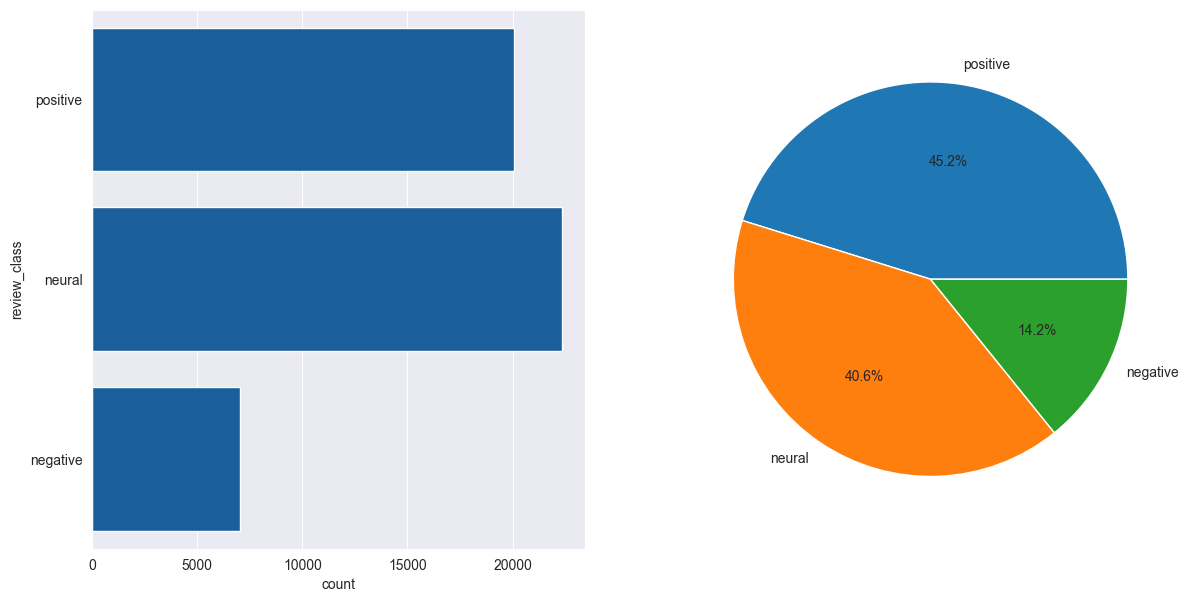

In [23]:
label = ['positive','neural','negative']
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sb.countplot(data.review_class,color='#0461b2')
plt.subplot(1,2,2)
plt.pie(data.review_class.value_counts(),labels=label,autopct='%1.1f%%');

In [24]:
#H√†m x·ª≠ l√Ω count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
def count_vectorizer(data,max_features,n_gram,vocabulary):
    cv = CountVectorizer(max_features=max_features,ngram_range=n_gram,stop_words=stop_words_list,vocabulary=vocabulary)
    cv_transformed = cv.fit(data['processed_comments']).transform(data['processed_comments'])
    cv_array = cv_transformed.toarray()
    cv_df = pd.DataFrame(cv_array,columns=cv.get_feature_names())
    data_temp = data.reset_index(drop=True)
    cv_df.reset_index(drop=True,inplace=True)
    #data_cv = pd.concat([data_temp,cv_df],axis=1,sort=False)
    return cv_df

In [25]:
#H√†m x·ª≠ l√Ω b·∫±ng tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
def tf_idf(data,max_features,n_gram,vocabulary):
    tf = TfidfVectorizer(max_features=max_features,ngram_range=n_gram,vocabulary=vocabulary)
    tf.fit_transform(data['processed_comments'])
    tf_transfrom = tf.transform(data['processed_comments'])
    tf_array = tf_transfrom.toarray()
    tfdf = pd.DataFrame(tf_array,columns=tf.get_feature_names_out())
    df_temp = data.reset_index(drop=True)
    tfdf.reset_index(drop=True,inplace=True)
    return tfdf

In [26]:
#S·ª≠ d·ª•ng SVD ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu:

def svd_function(X):
  from sklearn.decomposition import TruncatedSVD
  svd = TruncatedSVD(n_components=300, random_state=42)
  X_svd = svd.fit(X).transform(X)
  return X_svd

In [27]:
#H√†m c√¢n b·∫±ng d·ªØ li·ªáu b·∫±ng under sampling:
from imblearn.under_sampling import RandomUnderSampler
def under_sampling(X,y):
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
    rs = RandomUnderSampler()
    X_train, y_train = rs.fit_resample(X_train,y_train)
    return X_train,X_test, y_train,y_test

In [28]:
#H√†m c√¢n b·∫±ng d·ªØ li·ªáu b·∫±ng over sampling:
from imblearn.over_sampling import RandomOverSampler, SMOTE
def over_sampling(X,y):
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
    X_train, y_train = RandomOverSampler().fit_resample(X_train,y_train)
    return X_train,X_test, y_train,y_test

In [29]:
# Vi·∫øt function SelectKbest ƒë·ªÉ ch·ªçn c√°c bi·∫øn c√≥ t∆∞∆°ng quan t·ªët nh·∫•t.
def select_k_best_features(X,y, threshold=1.0):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    #X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

    best_k_features = SelectKBest(score_func=f_classif, k='all')
    #best_k_features.fit(X_train, y_train)
    best_k_features.fit(X, y)
    score = pd.Series(best_k_features.scores_)
    col = pd.Series(X.columns)
    result = pd.DataFrame({'Features': col, 'Score': score}).sort_values(by='Score', ascending=False)

    #print(result)
    plt.figure(figsize=(20,10))
    result_ = result.iloc[:100]
    plt.bar( result_.Features,result_.Score)
    plt.xticks(rotation=90)

    result_worst = result[result['Score'] < threshold]
    features_worst = result_worst['Features'].to_list()
    X_k_best = X.drop(features_worst,axis=1)
    features_best = list(X_k_best.columns)
    #return X_train[features], X_test[features], y_train, y_test
    return X_k_best,features_best, features_worst,result

In [30]:
#T·∫°o dataframe v·ªõi tf_idf
X_gram = tf_idf(data,3000,(1,2),None)
#Output:
y = data['review_class_num']

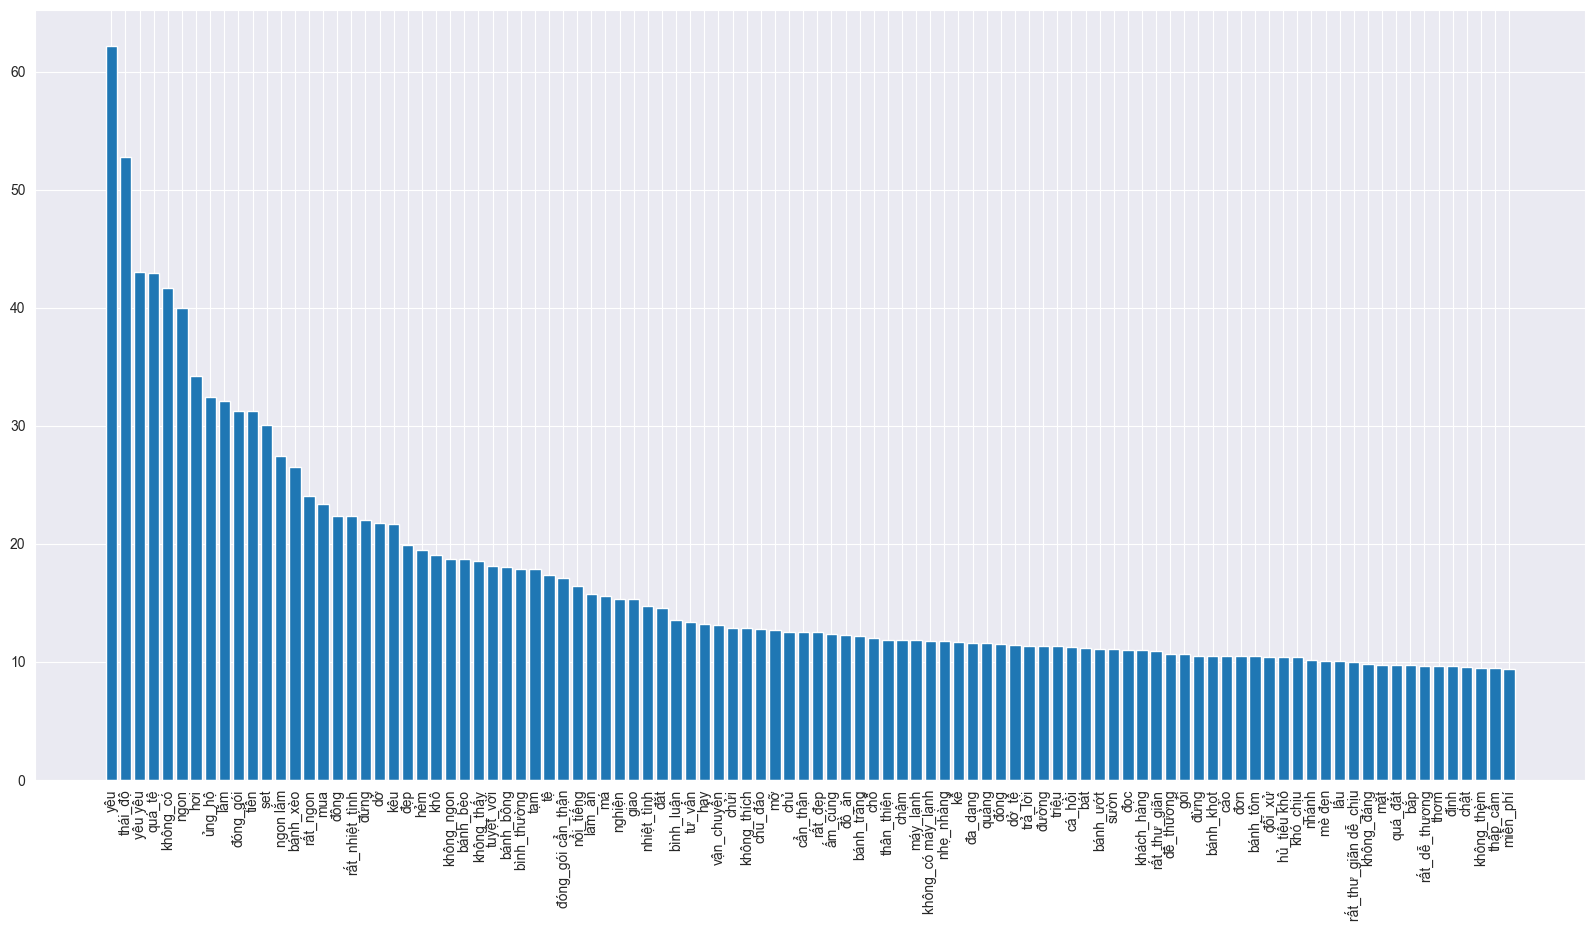

In [31]:
#Ta ch·ªçn c√°c feature ph√π h·ª£n nh·∫•t qua selectkbest
X_tf,vocabulary, stop_words,result = select_k_best_features(X_gram,y,7)

In [32]:
from sklearn.model_selection import KFold, train_test_split, cross_validate

#Dataset t·∫°o b·ªüi tf-idf kh√¥ng re-sampling:
dataset_1 = train_test_split(X_tf,y)
#Dataset t·∫°o b·ªüi tf-idf d√πng under-sampling:
dataset_2 = under_sampling(np.array(X_tf),y)
#Dataset t·∫°o b·ªüi tf-idf d√πng over-sampling:
dataset_3 = over_sampling(np.array(X_tf),y)

In [33]:
# T·∫°o list data-set:
list_data_set = [
             ('data tf-idf original', dataset_1),
             ('data tf-idf under-sampling', dataset_2),
             ('data tf-idf over-sampling', dataset_3)
]

In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score
import math
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# Chon k tu KNN
def choose_k(X_train, X_test, Y_train, Y_test):
    list_k = []
    list_acc = []
    for K_value in range(2, 11):
    
        list_k.append(K_value)
        neigh = KNeighborsClassifier(n_neighbors = K_value)
        neigh.fit(X_train, Y_train)
        Y_pred = neigh.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)*100
        train_knn = neigh.score(X_train, Y_train)
        test_knn = neigh.score(X_test, Y_test)
        
        list_acc.append(acc)
        print('Accuracy is', accuracy_score(Y_test, Y_pred)*100, "% for K-Value", K_value)
        print('Difference train vs test: ', abs(train_knn-test_knn),'\n')
    
    vi_tri = list_acc.index(max(list_acc))
    k = list_k[vi_tri]
    return k

In [ ]:
def model_comparison(x_train, x_test, y_train, y_test):
    models = [LogisticRegression(),
             MultinomialNB(),
             SVC(kernel = 'linear'),
             LinearSVC(),
             KNeighborsClassifier(n_neighbors = choose_k(x_train, x_test, y_train, y_test)), 
             RandomForestClassifier(n_estimators=40),
             DecisionTreeClassifier(),
             SGDClassifier(),
             AdaBoostClassifier(),
             XGBClassifier()
             ]

    CV = 10
    entries = []
    i=0
    for model in models:
        scores_train = []
        scores_test = []
        acc_scores = []
        times = []
        abs_scores = []
        for j in range(CV):
            t1 = datetime.datetime.now()
            model_name = model.__class__.__name__
            model.fit(X_train,Y_train)
            t2 = datetime.datetime.now()    
            d = round((t2 - t1).microseconds/1000,1) # => miliseconds
            score_train = model.score(x_train,y_train)
            score_test = model.score(x_test,y_test)
            Y_pred = model.predict(x_test)
            abs_score = abs(score_train - score_test)
            acc_score = accuracy_score(Y_pred, y_test)

            scores_train.append(score_train)          
            scores_test.append(score_test)
            acc_scores.append(acc_score)
            abs_scores.append(abs_score)
            times.append(d) 

        entries.append([model_name, np.array(scores_train).mean(), 
                        np.array(scores_test).mean(), np.array(acc_scores).mean(), np.array(abs_scores).mean(), 
                        np.array(times).mean()])
        i += 1
    cv_df = pd.DataFrame(entries, 
                         columns=['model_name', 'score_train_mean', 
                                  'score_test_mean', 'acc_score_mean','abs|score|', 'time_mean'])
    return cv_df

In [ ]:
X_train, X_test, Y_train, Y_test = dataset_1
model_comparison(X_train, X_test, Y_train, Y_test)

### Dataset 2

In [ ]:
X_under_train, X_under_test, Y_under_train, Y_under_test = dataset_2
model_comparison(X_under_train, X_under_test, Y_under_train, Y_under_test)

### Dataset 3

In [ ]:
X_over_train, X_over_test, Y_over_train, Y_over_test = dataset_3
model_comparison(X_over_train, X_over_test, Y_over_train, Y_over_test)

In [35]:
from numpy import concatenate
from sklearn.semi_supervised import LabelPropagation
from numpy import concatenate
from sklearn.feature_extraction.text import TfidfTransformer

import os
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

In [36]:
########################################################

In [37]:
data_labeled = pd.read_csv('labeled_data.csv')
data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  890 non-null    object
 1   ratings   890 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [38]:
data_labeled = data_labeled.drop_duplicates(subset='comments').reset_index()
data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     881 non-null    int64 
 1   comments  881 non-null    object
 2   ratings   881 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.8+ KB


In [39]:
data_labeled['processed_comments'] = ""
i = 0
for comment in data_labeled['comments']:
    document = process_text(comment, emoji_dict, teen_dict, wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document,stopwords_lst)
    data_labeled['processed_comments'][i] = document
    i = i + 1

In [40]:
data_labeled['review_class'] = ['positive' if a >= 8 else 'negative' if a < 5 else 'neural' for a in data_labeled.ratings]
#label encoder:
data_labeled['review_class_num'] = [0 if x == 'positive'  else 1 if x == 'neural' else 2 for x in data_labeled.review_class]

In [41]:
df_labeled = data_labeled[['processed_comments', 'review_class_num']]
df_labeled.shape

(881, 2)

In [42]:
df_org = data.loc[~((data['comments'] == 'm√¨ tr·ªôn th·∫≠p c·∫©m') | (data['comments'].str.contains('pass voucher')) | 
                      (data['comments'].str.contains('c·∫ßn b√°n voucher')))]
df_org.shape

(49411, 5)

In [43]:
df_org = df_org[['processed_comments']]


In [44]:
df_not_labeled = df_org[~df_org.processed_comments.isin(df_labeled.processed_comments.to_list())]
df_not_labeled.shape

(48096, 1)

In [45]:
df_not_labeled.head()

processed_comments
0          tuy·ªát_v·ªùi
1      tuy·ªát_v·ªùi y√™u
2      tuy·ªát_v·ªùi y√™u
3          tuy·ªát_v·ªùi
4      tuy·ªát_v·ªùi y√™u

In [46]:
df_final = pd.concat([df_labeled,df_not_labeled])
df_final.head()

processed_comments  review_class_num
0  n·∫±m_t√¢m ƒëi_l·∫°i chuy√™n_ƒë·ªì ·∫©m_th·ª±c_singapor hay ...               0.0
1  d√≤ng_s·∫ª tr∆∞·ªõc_ti√™n_l√Ω ƒÉn_nh√°nh r·∫•t_ngon ·∫•n_t∆∞·ª£...               2.0
2  ch·ª•c ƒë·ªì_ƒÉn_u·ªëng ti·ªán l·∫Øm chi√™n c·ª•c hay b∆∞ng h√†...               0.0
3                             kh√¥ s·ª£i to g√†_m·ªÅm th∆°m               0.0
4  b√°nh_x√®o to kh√¥ d·∫ßu_m·ª° m√πi_v·ªã r·∫•t_b√¨nh_th∆∞·ªùng ...               2.0

In [47]:
df_final.tail()

processed_comments  review_class_num
49454              t∆∞·ªüng ng·ªù s·ªëng kh·ªïng_l·ªì ƒÉn_no b·ªÉ b·ª•ng               NaN
49455  ƒë√¥ng n∆∞·ªõng ch·ª•c r·∫•t_th·∫≠t hay ·ªï gi√° h·ª£p_l√Ω ·ªï kh...               NaN
49456  th·ª≠ ƒë√¥ng gi√° ·ªïn l·ªÅ_ƒë∆∞·ªùng h∆°i b·ª•i l√°t l·ªët m·ª° ch...               NaN
49457  gi√°_c·∫£ kh√¥ng_r·∫ª l·ªÅ_ƒë∆∞·ªùng ƒë√¥ng ƒë·∫∑c_bi·∫øt tu·∫ßn ƒë·ªì...               NaN
49458  kh√¥ng_h·ªëi_h·∫≠n l·∫Øm ƒë·ªìn hay kh√¥ng_m√† ƒÉn_h∆°i s·ªëng...               NaN

In [48]:
df_final.fillna(-1, inplace=True)
df_final.tail()

processed_comments  review_class_num
49454              t∆∞·ªüng ng·ªù s·ªëng kh·ªïng_l·ªì ƒÉn_no b·ªÉ b·ª•ng              -1.0
49455  ƒë√¥ng n∆∞·ªõng ch·ª•c r·∫•t_th·∫≠t hay ·ªï gi√° h·ª£p_l√Ω ·ªï kh...              -1.0
49456  th·ª≠ ƒë√¥ng gi√° ·ªïn l·ªÅ_ƒë∆∞·ªùng h∆°i b·ª•i l√°t l·ªët m·ª° ch...              -1.0
49457  gi√°_c·∫£ kh√¥ng_r·∫ª l·ªÅ_ƒë∆∞·ªùng ƒë√¥ng ƒë·∫∑c_bi·∫øt tu·∫ßn ƒë·ªì...              -1.0
49458  kh√¥ng_h·ªëi_h·∫≠n l·∫Øm ƒë·ªìn hay kh√¥ng_m√† ƒÉn_h∆°i s·ªëng...              -1.0

In [49]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
import os

In [50]:
from imblearn.pipeline import Pipeline
# Parameters
vectorizer_params = dict(ngram_range=(1, 2), min_df=5, max_df=0.85)
logistic_params = dict(multi_class='multinomial', C=1, solver='saga', penalty='l1')
SMOTE(random_state=42)
# Supervised Pipeline
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", LogisticRegression(**logistic_params)),

    ]
)
# SelfTraining Pipeline
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", SelfTrainingClassifier(LogisticRegression(**logistic_params), verbose=True)),
    ]
)
# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading())
    ]
)

In [51]:
def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "Micro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="micro")
    )
    print("-" * 10)
    print()

In [52]:
df_train = df_final[df_final.review_class_num >= 0]
df_test = df_final[df_final.review_class_num < 0]

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train['processed_comments'], df_train['review_class_num'])

In [54]:
X_train.head()

360    l√¢u gh√© tho√°ng_m√°t s·∫°ch_s·∫Ω nhanh h·ªß_ti·∫øu nhanh...
628                                   qu√°_ngon_ƒë√°ng ti·ªÅn
258    th∆∞∆°ng_hi·ªáu ch√∫_t·∫Øc k·ª≥_ƒë·ªìng n·ªïi_ti·∫øng kh·∫Øp b√© ...
103    t∆∞∆°ng_ƒëen l·∫©u m·ª≥ t∆∞∆°ng_ƒëen v·ªã r·∫•t_nh·∫°t kh√¥ng_n...
698    sinh_nh·∫≠t vigor v√¥_t√¨nh ch·ªìng zem nh·∫≠n_x√©t ngh...
Name: processed_comments, dtype: object

In [55]:
print("Supervised LogisticClassifier on 20% of the training data:")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

# set the non-masked subset to be unlabeled
print("SelfTrainingClassifier on 20% of the training data (rest is unlabeled):")
eval_and_print_metrics(st_pipeline, X_train, Y_train, X_test, Y_test)

# if "CI" not in os.environ:
#     # LabelSpreading takes too long to run in the online documentation
#     print("LabelSpreading on 20% of the data (rest is unlabeled):")
#     eval_and_print_metrics(ls_pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticClassifier on 20% of the training data:
Number of training samples: 660
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.778
----------

SelfTrainingClassifier on 20% of the training data (rest is unlabeled):
Number of training samples: 660
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.792
----------



In [56]:
model = st_pipeline.fit(X_train, Y_train)
Y_pred = model.predict(df_test['processed_comments'])

In [57]:
df_test['review_class_num'] = Y_pred

In [58]:
df_new = pd.concat([df_train, df_test[['processed_comments', 'review_class_num']]], ignore_index=True)

In [59]:
df_new.to_csv('Labeled_Foody_Review_from_model.csv', index=False)

In [60]:
df_new.head()

processed_comments  review_class_num
0  n·∫±m_t√¢m ƒëi_l·∫°i chuy√™n_ƒë·ªì ·∫©m_th·ª±c_singapor hay ...               0.0
1  d√≤ng_s·∫ª tr∆∞·ªõc_ti√™n_l√Ω ƒÉn_nh√°nh r·∫•t_ngon ·∫•n_t∆∞·ª£...               2.0
2  ch·ª•c ƒë·ªì_ƒÉn_u·ªëng ti·ªán l·∫Øm chi√™n c·ª•c hay b∆∞ng h√†...               0.0
3                             kh√¥ s·ª£i to g√†_m·ªÅm th∆°m               0.0
4  b√°nh_x√®o to kh√¥ d·∫ßu_m·ª° m√πi_v·ªã r·∫•t_b√¨nh_th∆∞·ªùng ...               2.0

In [61]:
# T·∫°o l·∫°i train test split t·ª´ datafame m·ªõi l√† df_new
X_train, X_test, Y_train, Y_test = train_test_split(df_new['processed_comments'], df_new['review_class_num'], test_size=0.2)

In [62]:
print("Supervised LogisticRegressor")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticRegressor
Number of training samples: 39181
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.961
----------



In [63]:
model_new = pipeline.fit(X_train, Y_train)
Y_pred = model_new.predict(X_test)

In [64]:
model_new.score(X_train,Y_train)

0.9695770909369337

In [65]:
model_new.score(X_test,Y_test)

0.9620253164556962

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      5823
         1.0       0.84      0.95      0.90       995
         2.0       0.96      0.96      0.96      2978

    accuracy                           0.96      9796
   macro avg       0.93      0.96      0.94      9796
weighted avg       0.96      0.96      0.96      9796



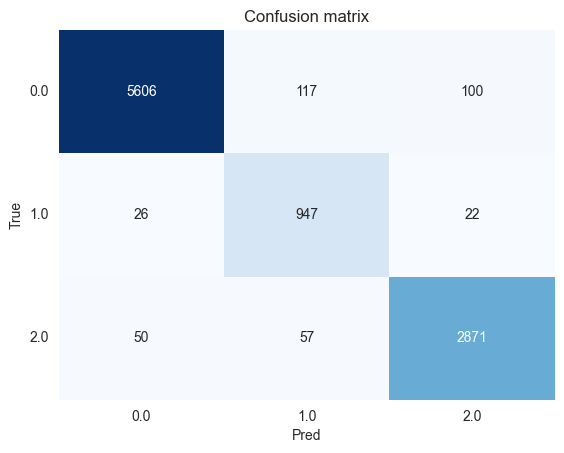

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
# print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))
print('Classification report: \n', classification_report(Y_test, Y_pred))
classes = np.unique(Y_test)
Y_test_array = pd.get_dummies(Y_test, drop_first=False).values
## Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots()
sb.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

In [67]:
text ="Kh√¥ng gian qu√°n r·∫•t tho·∫£i m√°i v√† th·ª©c ƒÉn th·∫≠t s·ª± ngon mi·ªáng. M√¨nh ƒë√£ c√≥ m·ªôt tr·∫£i nghi·ªám tuy·ªát v·ªùi ·ªü ƒë√¢y."
document = replace_word(text)
document = process_text(document, emoji_dict, teen_dict, wrong_lst)
document = convert_unicode(document)
document = process_postag_thesea(document)
# document
document = remove_stopword(document,stopwords_lst)
yhat = model_new.predict([document])[0]
if yhat== 0:
    label = "b√¨nh lu·∫≠n t√≠ch c·ª±c"
elif yhat== 1:
    label = "b√¨nh lu·∫≠n trung t√≠nh"
else:
    label = "b√¨nh lu·∫≠n ti√™u c·ª±c"
print(label)
#     print(proba, '\n')
print(document)

b√¨nh lu·∫≠n t√≠ch c·ª±c
r·∫•t_tho·∫£i_m√°i th·ª©c_ƒÉn ngon_mi·ªáng tr·∫£i_nghi·ªám tuy·ªát_v·ªùi


In [ ]:
pos_tag('sang tr·ªçng')

In [ ]:
####################################